# Statistiques et Analyse en Composante Principale

### On donne les fonctions du TP précédent

In [1]:
# Ecrire une fonction donnant la moyenne d'une série statistique
def moy(X):
    e=0
    n=len(X)
    for i in range(n):
        e+=X[i]
    return e/n

In [2]:
# La variance d'une série statistique:
def varS(X):
    v=0
    n=len(X)
    m=moy(X)
    for i in range(n):
        v+=(X[i]-m)^2
    return v/n

In [3]:
# l'écart-type
def ecTypeS(X):
    return sqrt(varS(X))

In [4]:
# Ecrire une fonction donnant la loi marginals  P(X=a) à partir des lois conjointes 
def margX(a,Y,C):
    s=0
    for j in Y:
        s+=C[(a,j)]
    return s

In [5]:
# Toutes les lois marginales de X sous forme d'un dictionnaire
def MargX(X,Y,C):
    return {i:margX(i,Y,C) for i in X}

In [6]:
# idem pour Y
def margY(b,X,C):
    s=0
    for i in X:
        s+=C[(i,b)]
    return s

In [7]:
# Calcul des lois marginales de Y à partir de la matrice conjointe
def MargY(X,Y,C):
    return {j:margY(j,X,C) for j in Y}

In [8]:
# Ecrire une fonction calculant la covariance d'un couple de séries statistiques
def covS(X,Y):
    #moyenne(xy) - moyenne(x)*moyenne(-y)
    n = len(X)
    cov = 0
    xbarre = moy(X)
    ybarre = moy(Y)
    for i in range(n):
        cov+= (X[i]-xbarre)*(Y[i]-ybarre)
    
    return 1/n * cov

In [20]:
# et le Coefficient de corrélation d'une série statistique
# cov(X,Y) / ( sqrt(var(X)) * sqrt(var(Y)) )
def corS(X,Y):
    a = covS(X,Y) /( ecTypeS(X) * ecTypeS(Y) )
    return a

In [40]:
# Construction de la matrice de covariance 
def matCov(D):
    mat=[]
    for x in D:
        L = []
        for y in D:
            if x==y:
                L.append(varS(D[x]))
            else:
                L.append(RR(covS(D[x],D[y])))
        mat.append(L)
    A = matrix(mat)
    return A

In [84]:
# et de la matrice de corrélation
def matCor(D):
    mat=[]
    for x in D:
        L = []
        for y in D:
            if x==y:
                L.append(1)
            else:
                L.append(RR(corS(D[x],D[y])))
        mat.append(L)
    A = matrix(mat)
    return A

## Exercice 1 

In [85]:
# Etude qualitative de 4 variables aléatoires couplées
data={1:[0,1,2,3,4,5,6,7,8,9,10] ,
  2:[2.04,3.02,4.15,4.97,6.02,7.08,8.12,9.14,10.13,10.86,11.89],
  3:[5.01,7.93,3.27,20.50,11.33,12.41,16.74,11.39,16.61,11.48,23.59],
  4:[7.45,8.20,2.09,9.03,7.99,8.58,9.63,5.06,2.49,8.22,8.01],
  5:[10.04,9.02,8.97,8.15,6.02,5.08,4.12,3.14,2.86,2.13,1.89]}

In [86]:
pretty_print(matCov(data))

[   10.0000000000000    9.90818181818182    12.2100000000000  -0.201818181818181   -8.96000000000000]
[   9.90818181818182    9.82534214876033    11.9971925619835  -0.331259504132232   -8.89960247933884]
[   12.2100000000000    11.9971925619835    35.1811537190083    5.10836611570248   -10.2181851239669]
[ -0.201818181818181  -0.331259504132232    5.10836611570248    6.07921983471074 -0.0382900826446289]
[  -8.96000000000000   -8.89960247933884   -10.2181851239669 -0.0382900826446289    8.29707768595041]

In [87]:
pretty_print(matCor(data))

[    1.00000000000000    0.999585910639362    0.650969476394899  -0.0258842964468328   -0.983660951392354]
[   0.999585910639362     1.00000000000000    0.645283781109229  -0.0428618174009167   -0.985676014953601]
[   0.650969476394899    0.645283781109229     1.00000000000000    0.349303592720272   -0.598075689504387]
[ -0.0258842964468328  -0.0428618174009167    0.349303592720272     1.00000000000000 -0.00539137823759926]
[  -0.983660951392354   -0.985676014953601   -0.598075689504387 -0.00539137823759926     1.00000000000000]

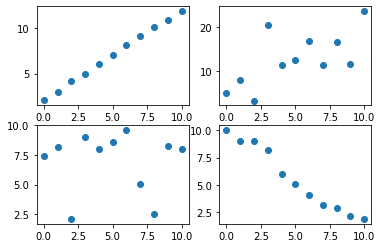

In [92]:
import matplotlib.pyplot as plt
# Représenter sur un même graphique les corrélations de la variable 1 avec les 4 autres variables
D=data
matricecor = matCor(D)

figures = plt.figure(1)
n=1
for cle in list(D)[1:]:
    plt.subplot(2,2,n)
    plt.scatter(D[1], D[cle])
    n+=1
plt.show()
    
    

Corrélation des caractéristiques à 1
2 0.999585910639362
3 0.650969476394899
4 -0.0258842964468328
5 -0.983660951392354


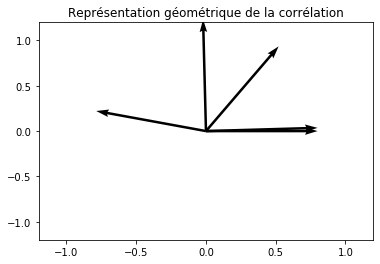

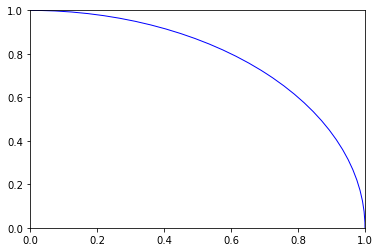

In [127]:
# Représentation géométriquement les corrélations avec la première variable
import matplotlib.pyplot as plt
import matplotlib.patches as pa
import numpy as np
X = np.array([0,0,0,0,0])
Y= np.array([0,0,0,0,0])
mat = matCor(data)
print("Corrélation des caractéristiques à 1")
for i in list(data)[1:]:
    print(i,RR(corS(data[1],data[i])))
U = mat[0]
V = []
for i in mat[0]:
    V.append(sin(arccos(i)))

B = plt.quiver(X, Y, U, V,scale=3)
a=1.2
plt.xlim(-a,a)
plt.ylim(-a,a)
plt.title("Représentation géométrique de la corrélation")
plt.show()
#------------------------------------------
#pb en fusionnant 2 graphes
axes = plt.gca()
axes.cla()
A = plt.Circle((0.0,0.0), 1.0, color='blue' ,fill=False)


plt.Circle((0.0,0.0), 1.0, color='blue' ,fill=False)
plt.gca().add_patch(A)






### Exercice 2 :  Voitures

In [18]:
voitures={
    "Alfasud" : [1350 ,79 ,393, 161, 870 ,165],
    "Audi" : [1588, 85, 468, 177, 1110 ,160 ],
    "Simca"  : [1294 ,68, 424, 168, 1050 ,152 ],
    "Citroen"  : [1222, 59, 412, 161, 930 ,151 ],
    "Fiat" : [1585, 98, 439, 164,1105 ,165 ],
    "Lancia"  :[1297 ,82 ,429, 169, 1080 ,160 ],
    "Peugeot" :[ 1796, 79, 449 ,169, 1160 ,154 ],
    "Renault16" : [1565,55, 424, 163, 1010 ,140], 
    "Renault30": [2664, 128, 452, 173, 1320,180], 
    "Toyota" : [1166, 55 ,399, 157, 815, 140], 
    "Alfetta" :[ 1570, 109, 428, 162, 1060, 175], 
    "Princess" : [1798 ,82, 445, 172, 1160 ,158 ],
    "Datsun" :[1998 ,115, 469, 169, 1370 ,160 ],
    "Taunus" : [1993, 98 ,438 ,170, 1080 ,167 ],
    "Rancho" :[1442 ,80 ,431, 166, 1129, 144 ],
    "Mazda" :[1769 ,83,440,165 ,1095, 165 ],
    "Opel": [1979, 100 ,459 ,173, 1120 ,173], 
    "Lada" : [1294, 68, 404 ,161, 955, 140]
}

In [19]:
# Définir sous forme d'un dictionnaire, les 6 variables (cylindrée, puissance, longueur, largeur, poids, vitesse max)


{1: [1350,
  1588,
  1294,
  1222,
  1585,
  1297,
  1796,
  1565,
  2664,
  1166,
  1570,
  1798,
  1998,
  1993,
  1442,
  1769,
  1979,
  1294],
 2: [79,
  85,
  68,
  59,
  98,
  82,
  79,
  55,
  128,
  55,
  109,
  82,
  115,
  98,
  80,
  83,
  100,
  68],
 3: [393,
  468,
  424,
  412,
  439,
  429,
  449,
  424,
  452,
  399,
  428,
  445,
  469,
  438,
  431,
  440,
  459,
  404],
 4: [161,
  177,
  168,
  161,
  164,
  169,
  169,
  163,
  173,
  157,
  162,
  172,
  169,
  170,
  166,
  165,
  173,
  161],
 5: [870,
  1110,
  1050,
  930,
  1105,
  1080,
  1160,
  1010,
  1320,
  815,
  1060,
  1160,
  1370,
  1080,
  1129,
  1095,
  1120,
  955],
 6: [165,
  160,
  152,
  151,
  165,
  160,
  154,
  140,
  180,
  140,
  175,
  158,
  160,
  167,
  144,
  165,
  173,
  140]}

Text(0, 0.5, 'Vitesse Max')

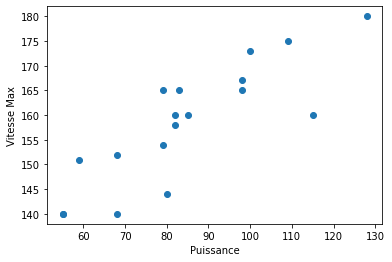

In [20]:
#Représenter quelques corrélations entre couples de variables


Text(0, 0.5, 'Puissance')

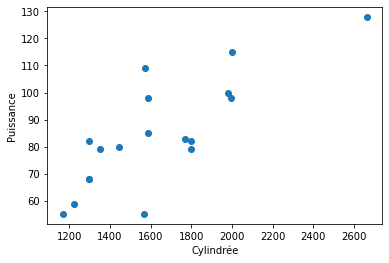

Text(0, 0.5, 'Vitesse Max')

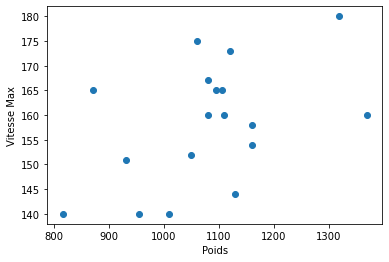

In [57]:
# C'est parti pour l'Analyse en Composante Principale


In [66]:
# calculer la matrice de corrélation

[ 1.0 0.80 0.70 0.63 0.79 0.67]
[0.80  1.0 0.64 0.52 0.77 0.84]
[0.70 0.64  1.0 0.85 0.87 0.48]
[0.63 0.52 0.85  1.0 0.72 0.47]
[0.79 0.77 0.87 0.72  1.0 0.48]
[0.67 0.84 0.48 0.47 0.48  1.0]

In [ ]:
# Avec numpy
import numpy as np
test = np.stack((Z[1],Z[2],Z[3], Z[4],Z[5],Z[6]))
Cor=np.corrcoef(test)

In [68]:
#Déterminer ses valeurs propres

[4.42085805960889, 0.856062289245721, 0.373066077444696, 0.213922089009116, 0.0928012120272884, 0.0432902726642898]

In [46]:
# Calculer l'inertie de la composante principale et du plan principal


0.736809676601481
0.879486724809102


Text(0.5, 1.0, 'Ebouli des valeurs propres')

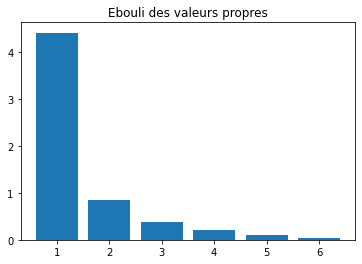

In [40]:
#Représenter l'ébouli des valeurs propres

plt.title("Ebouli des valeurs propres")

In [74]:
# Diagonaliser la matrice de corrélation. Soit P sa matrice de passage

[4.420858059608888,
 0.8560622892459582,
 0.3730660774399729,
 0.21392208902331017,
 0.09280121200592832,
 0.043290272675940246]

[   4.420858059608886                  0.0                  0.0                  0.0                  0.0                  0.0]
[                 0.0   0.8560622892459587                  0.0                  0.0                  0.0                  0.0]
[                 0.0                  0.0   0.3730660774399732                  0.0                  0.0                  0.0]
[                 0.0                  0.0                  0.0   0.2139220890233099                  0.0                  0.0]
[                 0.0                  0.0                  0.0                  0.0  0.09280121200592847                  0.0]
[                 0.0                  0.0                  0.0                  0.0                  0.0 0.043290272675940294] [ -0.42493602321352003  -0.12419108025271665   -0.3536125153225834      0.80778647836463   0.15158002775295676 -0.058895172349341024]
[ -0.42179440949983793  -0.41577389078786875  -0.18492049420391096   -0.3577919895498343   -0.2937346499591926   -0.6330330214961182]
[  -0.4214599308674995    0.4118177278968862   0.06763394247169545   -0.2797523141309945    0.7305690335209631  -0.19029152762890902]
[ -0.38692223986579083   0.44608699968676646    0.6048681183341382   0.21156940993319673  -0.47819008058320017  -0.10956623587114128]
[  -0.4305119823724684    0.2426758144888081   -0.4843960083166109  -0.30171136416090005   -0.3045584235266471    0.5808121973736305]
[ -0.35894427463645573   -0.6198626009748284   0.48547226100592533  -0.07357430149367006    0.1886551121777655    0.4585216660324102]

In [3]:
# Construire les deux composantes principales


Text(0.5, 1.0, 'Tracé suivant les composantes principales')

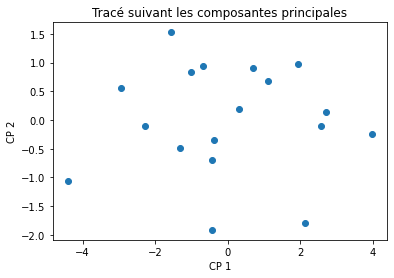

In [85]:
# Tracé les différents véhicules suivant les deux composantes principales
plt.scatter(C1,C2,marker='o')
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.title("Tracé suivant les composantes principales")

In [86]:
# Représenter graphiquement les contributions des variables aux composantes principales :


### Exercice 3 : Jus de fruit 

In [50]:
# Un jus de fruit est caractériqsé par les caractéristiques suivantes : 
# odeur, pulpeux, couleur, acidité, amertume, sucré, originalité
data={1:[2.82,2.53,1.66,3.46,3.15,2.97,2.60],
      2:[2.76,2.82,1.91,3.23,2.55,2.08,3.32 ],
      3:[2.83,2.88,4.0,3.45,2.42,1.76,3.38 ],
      4:[2.76,2.59,1.66,3.37,3.05,2.56,2.8 ],
      5:[3.2,3.02,3.69,3.12,2.33,1.97,3.34 ],
      6:[3.07,2.73,3.34,3.54,3.31,2.63,2.9 ],
     }